In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
DATA_PATH = r'C:\Users\Saleh\Desktop\kkbox-churn-prediction-challenge'
# DATA_PATH = r'C:\Users\Olabola\Desktop\kkbox-churn-prediction-challenge'

In [3]:
train_df = pd.read_csv(os.path.join(DATA_PATH, 'train_v2.csv', 'data', 'churn_comp_refresh', 'train_v2.csv'))
train_df.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [4]:
members_df = pd.read_csv(os.path.join(DATA_PATH, 'members_v3.csv', 'members_v3.csv'))
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [5]:
transactions_df = pd.read_csv(os.path.join(DATA_PATH, 'transactions_v2.csv', 'data', 'churn_comp_refresh', 'transactions_v2.csv'))
transactions_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


## First merge
Now we will merge train_df with members_df on the msno column.

In [6]:
members_train_df = pd.merge(left=train_df, right=members_df, how='left', on='msno')
members_train_df.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,20131223.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,20131227.0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,20140109.0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,20140125.0


## Missing values 
As a result of merging the two dataframes, there are many missing values in the resulting merged dataframe. This is because some of the users in the train dataframe have no information in the members dataframe. 

This occurs in 109,993 rows or 11% of the rows. Since this is such a small amount of the data these rows will be removed.

In [7]:
members_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    970960 non-null  object 
 1   is_churn                970960 non-null  int64  
 2   city                    860967 non-null  float64
 3   bd                      860967 non-null  float64
 4   gender                  388905 non-null  object 
 5   registered_via          860967 non-null  float64
 6   registration_init_time  860967 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 59.3+ MB


In [8]:
members_train_df.isna().sum()

msno                           0
is_churn                       0
city                      109993
bd                        109993
gender                    582055
registered_via            109993
registration_init_time    109993
dtype: int64

In [9]:
# There are 109,993 instances that have no members information. These rows will be removed.
members_train_df = members_train_df.dropna(subset=['bd'])

In [10]:
members_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860967 entries, 0 to 970958
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    860967 non-null  object 
 1   is_churn                860967 non-null  int64  
 2   city                    860967 non-null  float64
 3   bd                      860967 non-null  float64
 4   gender                  388905 non-null  object 
 5   registered_via          860967 non-null  float64
 6   registration_init_time  860967 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 52.5+ MB


In [11]:
# Convert dates to datetime format
date_int_df = pd.DataFrame(members_train_df.registration_init_time.astype(int))
date_str_df = pd.DataFrame(members_train_df.registration_init_time.astype(str))

# Convert registration_init_time column to datetime format 
members_train_df.registration_init_time = pd.to_datetime(date_str_df.registration_init_time, format='%Y%m%d')
members_train_df['month'] = members_train_df.registration_init_time.dt.month
members_train_df['day'] = members_train_df.registration_init_time.dt.day_of_week
members_train_df.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,month,day
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23,12,0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013-12-23,12,0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,12,4
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,1,3
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,2014-01-25,1,5


In [12]:
members_train_df.describe()

,is_churn,city,bd,registered_via,month,day
count,860967.000000,860967.000000,860967.000000,860967.000000,860967.000000,860967.000000
mean,0.094601,5.937295,13.583854,6.892744,6.561337,3.060597
std,0.292663,6.441203,20.064040,1.937794,3.628476,2.002570
min,0.000000,1.000000,-3152.000000,3.000000,1.000000,0.000000
25%,0.000000,1.000000,0.000000,7.000000,3.000000,1.000000
50%,0.000000,1.000000,0.000000,7.000000,7.000000,3.000000
75%,0.000000,13.000000,27.000000,9.000000,10.000000,5.000000
max,1.000000,22.000000,2016.000000,13.000000,12.000000,6.000000


<AxesSubplot:xlabel='city', ylabel='count'>

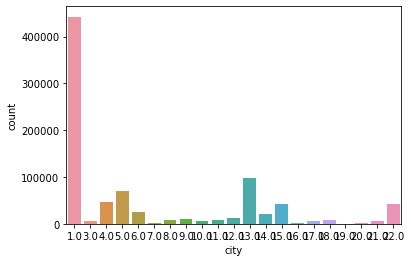

In [13]:
sns.countplot(data=members_train_df, x='city')

In [14]:
members_train_df.city.value_counts()

1.0     442598
13.0     97136
5.0      70706
4.0      47227
15.0     43187
22.0     41991
6.0      26066
14.0     20013
12.0     11383
9.0       9526
11.0      9138
18.0      7792
8.0       7589
10.0      6470
17.0      5476
21.0      5199
3.0       5057
7.0       2652
16.0       944
20.0       677
19.0       140
Name: city, dtype: int64

In [15]:
members_train_trans_df = pd.merge(left=members_train_df, right=transactions_df, how='left', on='msno')
members_train_trans_df.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,month,day,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013-12-23,12,0,36.0,30.0,180.0,180.0,0.0,20170311.0,20170411.0,0.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,12,4,17.0,60.0,0.0,0.0,0.0,20170311.0,20170314.0,0.0
3,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,12,4,15.0,90.0,300.0,300.0,0.0,20170314.0,20170615.0,0.0
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,1,3,41.0,30.0,149.0,149.0,1.0,20150908.0,20170608.0,0.0


In [16]:
members_train_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052582 entries, 0 to 1052581
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   msno                    1052582 non-null  object        
 1   is_churn                1052582 non-null  int64         
 2   city                    1052582 non-null  float64       
 3   bd                      1052582 non-null  float64       
 4   gender                  501005 non-null   object        
 5   registered_via          1052582 non-null  float64       
 6   registration_init_time  1052582 non-null  datetime64[ns]
 7   month                   1052582 non-null  int64         
 8   day                     1052582 non-null  int64         
 9   payment_method_id       1016983 non-null  float64       
 10  payment_plan_days       1016983 non-null  float64       
 11  plan_list_price         1016983 non-null  float64       
 12  actual_amount_

In [17]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431009 entries, 0 to 1431008
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   msno                    1431009 non-null  object
 1   payment_method_id       1431009 non-null  int64 
 2   payment_plan_days       1431009 non-null  int64 
 3   plan_list_price         1431009 non-null  int64 
 4   actual_amount_paid      1431009 non-null  int64 
 5   is_auto_renew           1431009 non-null  int64 
 6   transaction_date        1431009 non-null  int64 
 7   membership_expire_date  1431009 non-null  int64 
 8   is_cancel               1431009 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 98.3+ MB


In [19]:
transactions_df.msno.value_counts()

72gJqt1O31E/WoxAEYFn9LHNI6mAZFGera5Q6gvsFkA=    208
5ty4nZkq54z93wQtBN7RHVYj8rNghBDCVBH+3xmxf0I=    172
OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=    148
WHsCtkOVsauvqBL0ULuG38887y7aU8GXdCmJMjw6hjQ=    145
SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=    131
                                               ... 
IYZ55jfdRviQ9IH+Bso+kC5+Appt4yMndpc4XQ4+ZhA=      1
y3jiS0TYC450BB9wPUL5t/d46vMcpvJQ9JqdXlbbru0=      1
0QC6k8erkZwc7Hj3NOVWqjYkaZReKDLuwK32ennnp18=      1
zI343Hoa+JdWYUz5Og6fgoGygI3R+DItmYXFu7ynmSQ=      1
5o9UlE+LHF9GKGucOfU0DzcHjLRLDBro8/r7B3Epnk0=      1
Name: msno, Length: 1197050, dtype: int64

In [20]:
transactions_df.msno.nunique()

1197050

In [21]:
transactions_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


In [24]:
transactions_df.isna().sum()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

In [30]:
transactions_df[transactions_df.msno == "IYZ55jfdRviQ9IH+Bso+kC5+Appt4yMndpc4XQ4+ZhA="].head(20)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
116411,IYZ55jfdRviQ9IH+Bso+kC5+Appt4yMndpc4XQ4+ZhA=,41,30,99,99,1,20170310,20170410,0


In [28]:
transactions_df.plan_list_price.value_counts()

149     594395
99      407750
180     115660
1788     83963
129      52986
100      43873
894      29677
0        18413
536      18335
1599     14727
477       7891
1200      7603
298       6049
300       4782
447       4041
480       3857
1299      3052
930       2796
600       2729
150       2144
699       2126
799       1434
119        527
35         322
1000       303
120        275
450        264
500        241
1399       137
2000       130
134        109
596         66
210         65
350         49
126         46
400         43
1150        35
1           25
1260        25
131         24
105         11
70          11
1300         6
143          4
265          4
50           2
30           1
15           1
Name: plan_list_price, dtype: int64

In [94]:
transactions_df_unique_msno = pd.DataFrame()

In [95]:
# Replace the payment method with the most frequent one:
transactions_df_unique_msno['payment_method_id'] = transactions_df.groupby('msno')['payment_method_id'].agg(pd.Series.mode)

In [96]:
# Add total payment_plan_days column
transactions_df_unique_msno['total_payment_plan_days'] = transactions_df.groupby('msno')['payment_plan_days'].agg(np.sum)

In [97]:
# Add total plan_list_price column
transactions_df_unique_msno['total_plan_list_price'] = transactions_df.groupby('msno')['plan_list_price'].agg(np.sum)

In [98]:
# Add total actual_amount_paid column
transactions_df_unique_msno['total_actual_amount_paid'] = transactions_df.groupby('msno')['actual_amount_paid'].agg(np.sum)

In [99]:
# Add ratio_cancel column
transactions_df_unique_msno['ratio_cancel'] = transactions_df.groupby('msno')['is_cancel'].agg(np.mean)

In [83]:
transactions_df_unique_msno.head()

,total_payment_plan_days,total_plan_list_price,total_actual_amount_paid,has_cancelled
msno,,,,
+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,395,1599,1599,0
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,30,99,99,0
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,60,298,298,0
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,30,149,149,0
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,30,149,149,0


In [92]:
transactions_df_unique_msno.has_cancelled.value_counts()

0.000000    1162499
0.500000      17463
1.000000      10376
0.333333       3934
0.200000        450
             ...   
0.044444          1
0.021277          1
0.300000          1
0.176471          1
0.107143          1
Name: has_cancelled, Length: 82, dtype: int64

In [100]:
# Add a ratio_auto_renew column
transactions_df_unique_msno['ratio_auto_renew'] = transactions_df.groupby('msno')['is_auto_renew'].agg(np.mean)

In [90]:
transactions_df_unique_msno.has_cancelled.value_counts()

0.000000    1162499
0.500000      17463
1.000000      10376
0.333333       3934
0.200000        450
             ...   
0.044444          1
0.021277          1
0.300000          1
0.176471          1
0.107143          1
Name: has_cancelled, Length: 82, dtype: int64

<AxesSubplot:xlabel='ratio_auto_renew', ylabel='Density'>

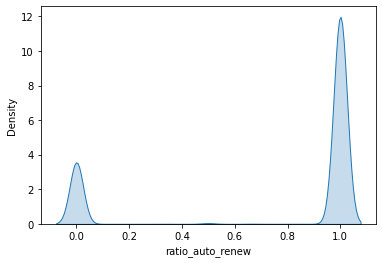

In [93]:
sns.kdeplot(data=transactions_df_unique_msno.ratio_auto_renew, shade=True)

In [102]:
transactions_df_unique_msno.head()

,payment_method_id,total_payment_plan_days,total_plan_list_price,total_actual_amount_paid,ratio_cancel,ratio_auto_renew
msno,,,,,,
+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,22,395,1599,1599,0.0,0.0
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,0.0,1.0
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,60,298,298,0.0,1.0
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41,30,149,149,0.0,1.0
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,41,30,149,149,0.0,1.0


In [103]:
transactions_df[transactions_df.msno == '+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s='].head(20)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,total_payment_plan_days,total_plan_list_price,total_actual_amount_paid,has_cancelled
249714,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,22,395,1599,1599,0,20161023,20180206,0,NaN,NaN,NaN,0
